#### Import libraries

In [1]:
# Library for mathematical processes
import numpy as np
# Data management library
import pandas as pd
# Library for graphics
import matplotlib.pyplot as plt
# Library for calculating the statistical significance and correlation coefficient
from scipy import stats

#### Load group data

In [2]:
group_data = pd.read_csv('data/group_data.csv', sep=";")

group_data

,students,final_grade,percentage_attendance_group_tutoring,percentage_exercises_workshops_reinforcement
0,STUDENT 1,3.0,36,100
1,STUDENT 2,3.1,54,88
2,STUDENT 3,3.9,45,100
3,STUDENT 4,3.7,45,100
4,STUDENT 5,4.6,54,100
5,STUDENT 6,3.1,18,44
6,STUDENT 7,3.7,36,100
7,STUDENT 8,4.6,45,100
8,STUDENT 9,2.3,18,33
9,STUDENT 10,2.3,0,0


In [3]:
# Statistics are generated
group_data.describe()

,final_grade,percentage_attendance_group_tutoring,percentage_exercises_workshops_reinforcement
count,36.000000,36.000000,36.00000
mean,3.683333,33.250000,84.75000
std,0.697137,13.404424,30.71005
min,1.900000,0.000000,0.00000
25%,3.250000,27.000000,88.00000
50%,3.700000,36.000000,100.00000
75%,4.200000,45.000000,100.00000
max,4.700000,63.000000,100.00000


#### Correlation of all variables for group

In [4]:
group_data.corr(method='spearman')

,final_grade,percentage_attendance_group_tutoring,percentage_exercises_workshops_reinforcement
final_grade,1.000000,0.315279,0.227041
percentage_attendance_group_tutoring,0.315279,1.000000,0.336426
percentage_exercises_workshops_reinforcement,0.227041,0.336426,1.000000


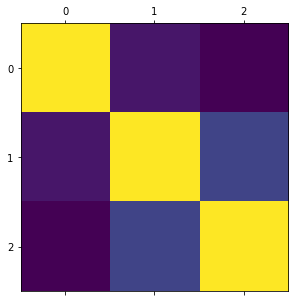

In [5]:
# Correlation matrix graph
plt.matshow(group_data.corr())

#### Correlation (pearson, spearman, kendall): final grade VS percentage attendance group tutoring

In [6]:
# Correlation calculation: final grade VS group_attendance_percentage
# ==============================================================================
print('Pearson: ', group_data['final_grade'].corr(group_data['percentage_attendance_group_tutoring'], method='pearson'))
print('Spearman: ', group_data['final_grade'].corr(group_data['percentage_attendance_group_tutoring'], method='spearman'))
print('Kendall: ', group_data['final_grade'].corr(group_data['percentage_attendance_group_tutoring'], method='kendall'))

Pearson:  0.327916280256489
Spearman:  0.3152786011733243
Kendall:  0.24167325432127926


#### Correlation and statistical significance: final grade VS percentage attendance group tutoring

In [7]:
# Correlation and significance calculation with Scipy
# ==============================================================================
r, p = stats.pearsonr(group_data['final_grade'], group_data['percentage_attendance_group_tutoring'])
print(f"Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(group_data['final_grade'], group_data['percentage_attendance_group_tutoring'])
print(f"Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(group_data['final_grade'], group_data['percentage_attendance_group_tutoring'])
print(f"Kendall: r={r}, p-value={p}")

Pearson: r=0.3279162802564889, p-value=0.05088760986927212
Spearman: r=0.3152786011733243, p-value=0.06106870100713267
Kendall: r=0.24167325432127926, p-value=0.05700850576840773


#### Correlation graph: final grade VS percentage attendance group tutoring

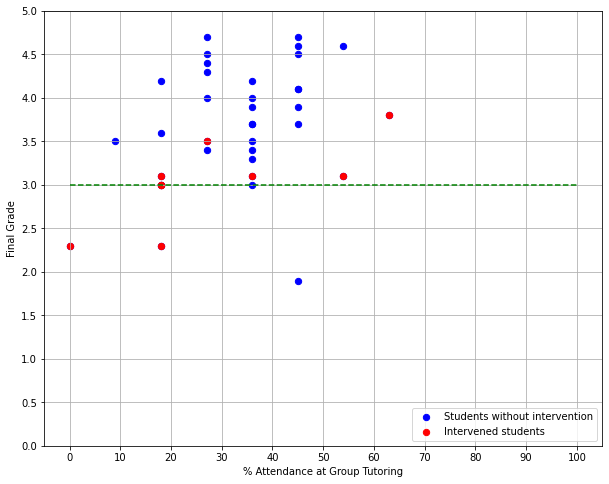

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(group_data['percentage_attendance_group_tutoring'], group_data['final_grade'], label="Students without intervention", c="blue", s=40, marker="o")
# Intervened students
x = [54, 18, 18, 0, 36, 27, 18, 63, 18]
y =[3.1, 3.1, 2.3, 2.3, 3.1, 3.5, 3.0, 3.8, 3.0]
plt.scatter(x, y, label="Intervened students", c="red", s=40, marker="o")
# Red line
x = [0, 10, 20, 30, 50, 50, 60, 70, 80, 90, 100]
y = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
plt.plot(x, y, linestyle="--", c="green")
plt.xlabel("% Attendance at Group Tutoring")
plt.xticks(range(0, 110, 10))
plt.ylabel("Final Grade")
yrange = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.yticks(yrange)
# Legend
plt.legend(loc = "lower right")
plt.grid()
#plt.savefig('Fig4.png', bbox_inches='tight', dpi=400)
plt.show()


#### -------------------------------------------------------

#### Correlation and statistical significance: final grade VS percentage exercises workshops reinforcement

In [9]:
# Correlation calculation: final_grade VS percentage_exercises_workshops_reinforcement
# ==============================================================================
r, p = stats.pearsonr(group_data['final_grade'], group_data['percentage_exercises_workshops_reinforcement'])
print(f"Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(group_data['final_grade'], group_data['percentage_exercises_workshops_reinforcement'])
print(f"Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(group_data['final_grade'], group_data['percentage_exercises_workshops_reinforcement'])
print(f"Kendall: r={r}, p-value={p}")

Pearson: r=0.28512559273416915, p-value=0.09187865835457622
Spearman: r=0.22704121068497735, p-value=0.18297900882037313
Kendall: r=0.18309556480110692, p-value=0.17528886701857793


#### Correlation graph: final grade VS percentage exercises workshops reinforcement

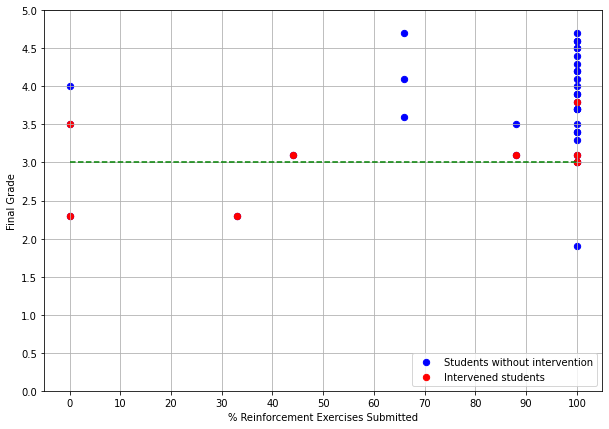

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(group_data['percentage_exercises_workshops_reinforcement'], group_data['final_grade'], label="Students without intervention", c="blue", s=40, marker="o")
# Intervened students
x = [88, 44, 33, 0, 100, 0, 100, 100, 100]
y =[3.1, 3.1, 2.3, 2.3, 3.1, 3.5, 3.0, 3.8, 3.0]
plt.scatter(x, y, label="Intervened students", c="red", s=40, marker="o")
# Red line
x = [0, 10, 20, 30, 50, 50, 60, 70, 80, 90, 100]
y = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
plt.plot(x, y, linestyle="--", c="green")
plt.xlabel("% Reinforcement Exercises Submitted")
plt.xticks(range(0, 110, 10))
plt.ylabel("Final Grade")
yrange = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.yticks(yrange)
# Legend
plt.legend(loc = "lower right")
plt.grid()
#plt.savefig('Fig5.png', bbox_inches='tight', dpi=400)
plt.show()


## -------------------------------------------------------------

## Data of students intervened

#### Upload data

In [11]:
data = pd.read_csv('data/data_intervened_students.csv', sep=";")

data

,students,final_grade,quantity_suggestion_recommendation,quantity_code_reference,percentage_attendance_group_tutoring,percentage_exercises_workshop_reinforcement_1,percentage_exercises_workshop_reinforcement_2,percentage_exercises_workshops_reinforcement
0,S1,3.1,4,3,54,100,83,89
1,S2,3.1,4,3,18,67,33,44
2,S3,2.3,4,3,18,67,17,33
3,S4,2.3,4,3,0,0,0,0
4,S5,3.1,4,3,36,100,100,100
5,S6,3.5,4,3,27,0,0,0
6,S7,3.0,4,3,18,100,100,100
7,S8,3.8,4,3,63,100,100,100
8,S9,3.0,4,3,18,100,100,100


#### Columns are removed from the DataFrame

In [12]:
# The columns: quantity_suggestion_recommendation and quantity_code_reference are removed from the DataFrame.
data = data.drop(['quantity_suggestion_recommendation'], axis=1)
data = data.drop(['quantity_code_reference'], axis = 1)

data

,students,final_grade,percentage_attendance_group_tutoring,percentage_exercises_workshop_reinforcement_1,percentage_exercises_workshop_reinforcement_2,percentage_exercises_workshops_reinforcement
0,S1,3.1,54,100,83,89
1,S2,3.1,18,67,33,44
2,S3,2.3,18,67,17,33
3,S4,2.3,0,0,0,0
4,S5,3.1,36,100,100,100
5,S6,3.5,27,0,0,0
6,S7,3.0,18,100,100,100
7,S8,3.8,63,100,100,100
8,S9,3.0,18,100,100,100


#### Correlation of all variables for intervened students.

In [13]:
# Spearman's correlation is calculated
data.corr(method='spearman')

,final_grade,percentage_attendance_group_tutoring,percentage_exercises_workshop_reinforcement_1,percentage_exercises_workshop_reinforcement_2,percentage_exercises_workshops_reinforcement
final_grade,1.000000,0.826025,0.217602,0.228757,0.228757
percentage_attendance_group_tutoring,0.826025,1.000000,0.520097,0.410963,0.410963
percentage_exercises_workshop_reinforcement_1,0.217602,0.520097,1.000000,0.948200,0.948200
percentage_exercises_workshop_reinforcement_2,0.228757,0.410963,0.948200,1.000000,1.000000
percentage_exercises_workshops_reinforcement,0.228757,0.410963,0.948200,1.000000,1.000000


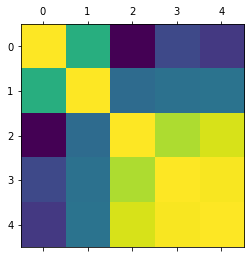

In [14]:
# Correlation graph
plt.matshow(data.corr())

#### Correlation and statistical significance: final grade VS percentage attendance group tutoring (only intervened students).

In [15]:
# # The correlation is calculated between: final_grade VS percentage_attendance_group_tutoring
# ==============================================================================
r, p = stats.pearsonr(data['final_grade'], data['percentage_attendance_group_tutoring'])
print(f"Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data['final_grade'], data['percentage_attendance_group_tutoring'])
print(f"Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data['final_grade'], data['percentage_attendance_group_tutoring'])
print(f"Kendall: r={r}, p-value={p}")

Pearson: r=0.7311810246710834, p-value=0.025196486270287977
Spearman: r=0.8260245679892639, p-value=0.00607305509315826
Kendall: r=0.7214084193623483, p-value=0.013044146925385613


#### Correlation graph: final grade VS percentage of attendance to group tutoring (only intervened students)

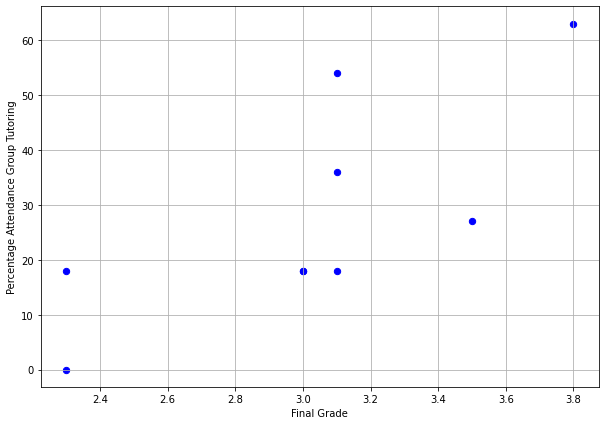

In [16]:
# Graph of points: final_grade VS percentage_attendance_group_tutoring
plt.figure(figsize=(10,7))
plt.scatter(data['final_grade'], data['percentage_attendance_group_tutoring'], c="blue", s=40, marker="o")
plt.xlabel("Final Grade")
plt.ylabel("Percentage Attendance Group Tutoring")
plt.grid()
plt.show()

#### ------------------------------------------------------------

#### Correlation and statistical significance: final_grade VS percentage_exercises_workshop_reinforcement_1 (intervened students only)

In [17]:
# The correlation is calculated between: final_grade VS percentage_exercises_workshop_reinforcement_1
# ==============================================================================
r, p = stats.pearsonr(data['final_grade'], data['percentage_exercises_workshop_reinforcement_1'])
print(f"Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data['final_grade'], data['percentage_exercises_workshop_reinforcement_1'])
print(f"Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data['final_grade'], data['percentage_exercises_workshop_reinforcement_1'])
print(f"Kendall: r={r}, p-value={p}")

Pearson: r=0.2774848672576353, p-value=0.4697389067364503
Spearman: r=0.21760174437497148, p-value=0.5738266245637574
Kendall: r=0.18330889377669166, p-value=0.5484148091664384


#### Correlation graph: final_grade VS percentage_exercises_workshop_reinforcement_1 (only students who have undergone the intervention)

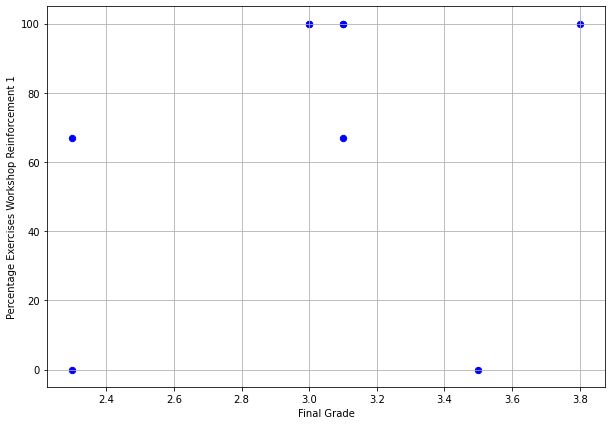

In [18]:
# Graph of points: final grade VS percentage of group tutoring attendance
plt.figure(figsize=(10,7))
plt.scatter(data['final_grade'], data['percentage_exercises_workshop_reinforcement_1'], c="blue", s=40, marker="o")
plt.xlabel("Final Grade")
plt.ylabel("Percentage Exercises Workshop Reinforcement 1")
plt.grid()
plt.show()

#### ------------------------------------------------------------

#### Correlation and statistical significance: final_grade VS percentage_exercises_workshop_reinforcement_2 (intervened students only)

In [19]:
# The correlation is calculated between: final_grade VS percentage_exercises_workshop_reinforcement_2
# ==============================================================================
r, p = stats.pearsonr(data['final_grade'], data['percentage_exercises_workshop_reinforcement_2'])
print(f"Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data['final_grade'], data['percentage_exercises_workshop_reinforcement_2'])
print(f"Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data['final_grade'], data['percentage_exercises_workshop_reinforcement_2'])
print(f"Kendall: r={r}, p-value={p}")

Pearson: r=0.4375653141346151, p-value=0.23885560543074305
Spearman: r=0.22875705971802346, p-value=0.5538266613710534
Kendall: r=0.16675933649126753, p-value=0.5704848275345603


#### Correlation graph: final grade VS percentage of reinforcement workshop 2 exercises (only intervened students)

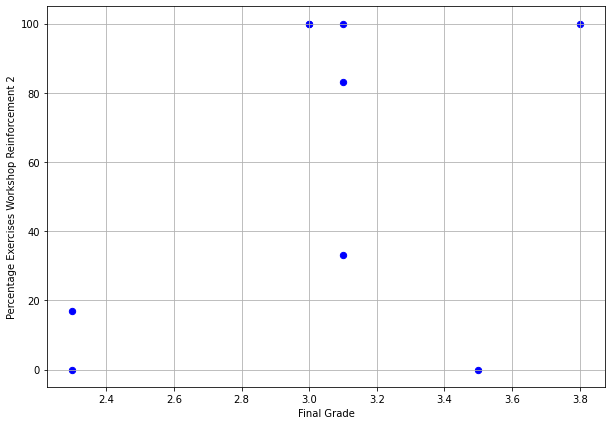

In [20]:
# Graph of points: final_grade VS percentage_exercises_workshop_reinforcement_2
plt.figure(figsize=(10,7))
plt.scatter(data['final_grade'], data['percentage_exercises_workshop_reinforcement_2'], c="blue", s=40, marker="o")
plt.xlabel("Final Grade")
plt.ylabel("Percentage Exercises Workshop Reinforcement 2")
plt.grid()
plt.show()

#### ------------------------------------------------------------

#### Correlation and statistical significance: final_grade VS percentage_exercises_workshops_reinforcement (only intervened students).

In [21]:
# The correlation is calculated between: final grade VS percentage of reinforcement workshop exercises 1 and 2.
# ==============================================================================
r, p = stats.pearsonr(data['final_grade'], data['percentage_exercises_workshops_reinforcement'])
print(f"Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data['final_grade'], data['percentage_exercises_workshops_reinforcement'])
print(f"Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data['final_grade'], data['percentage_exercises_workshops_reinforcement'])
print(f"Kendall: r={r}, p-value={p}")

Pearson: r=0.3964189581186092, p-value=0.2908429688969501
Spearman: r=0.22875705971802346, p-value=0.5538266613710534
Kendall: r=0.16675933649126753, p-value=0.5704848275345603


#### Correlation graph: final grade VS percentage of reinforcement workshop exercises 1 and 2 (only intervened students)

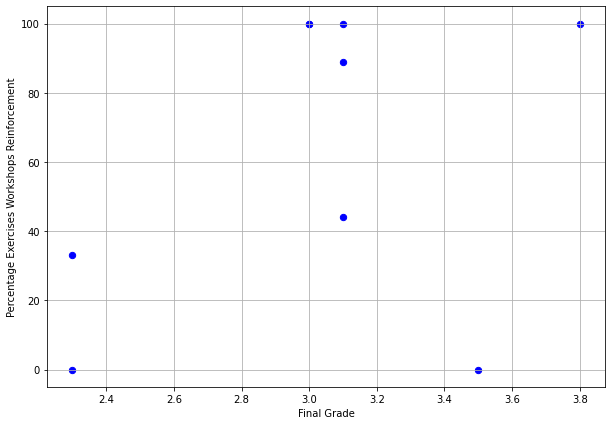

In [22]:
# Graph of points: final_grade VS percentage_exercises_workshops_reinforcement
plt.figure(figsize=(10,7))
plt.scatter(data['final_grade'], data['percentage_exercises_workshops_reinforcement'], c="blue", s=40, marker="o")
plt.xlabel("Final Grade")
plt.ylabel("Percentage Exercises Workshops Reinforcement")
plt.grid()
plt.show()